**Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**

**ЧАСТЬ 1**

## ШАГ. Приоритизация гипотез

**Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы *приоритизируют*.**

В этом шаге необходимо применить фреймворки  ICE и RICE для приоритизации гипотез и отсортировать их по убыванию. Далее необходимо проанализировать, как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить почему так получилось.


### Применяем фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

Прочитаем файлы с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [2]:
#импортируем все необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Для того, чтобы в таблице отображались полные названия гипотез, нужно задать некоторые настройки

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [5]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач

**ICE SCORE** = Impact * Confidence * Easy

**ICE SCORE** = (Impact * Confidence) / Efforts

In [6]:
# Применяем фреймворк ICE
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence'])/hypo['Efforts']

In [7]:
# Отсортируем по убыванию приоритета
hypo[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Мы обнаружили 3 наиболее перспективные гипотезы:**
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

### Применяем фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [8]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


Фреймворк **RICE** состоит из четырёх компонентов:
* **Reach** — скольких пользователей затронет изменение, которое вы хотите внести;
* **Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* **Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;
* **Efforts** — сколько стоит протестировать эту гипотезу.

**RICE SCORE** = (Reach * Impact * Confidence) / Efforts

In [9]:
# Применяем фреймворк RICE
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']) / hypo['Efforts']

In [10]:
# Отсортируем по убыванию приоритета
hypo[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Здесь можно выбрать 4 лучших гипотезы, одна из которых занимает абсолютное лидерство:**
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Вывод по шагу

При применении метода **RICE** изменилась приоритизация гипотез.

7-ая гипотеза ``Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`` поднялась с **третьего места на первое**, а **второе место** заняла 2-ая гипотеза ``Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа``.

Так произошло, потому что RICE учитывает, скольких пользователей затронет изменение. А у этих двух гипотез данный показатель имеет оценку **10** и  **8** соответственно. Поэтому приоритизация распределяется немного иначе.

А вот гипотеза ``Запустить акцию, дающую скидку на товар в день рождения`` имеет показатель **Reach** равный 1. Поэтому вообще не попала в четверку перспективных гипотез.

По этому же принципу гипотеза ``Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`` сместилась со второго места на третье.

Так же третье место разделила еще одна гипотеза ``Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию``, ведь ее показатель охвата **Reach** равен 5.


**ЧАСТЬ 2**

## Шаг. Анализ А/В теста

**Мы провели A/B-тест и получили результаты, которые описаны в следующих файлах ``orders`` и ``visitors``. Нам предстоит провести анализ А/В теста.**

### Построим график кумулятивной выручки по группам. Обозначим выводы и предположения.

* изучаем данные из таблиц с заказами и посетителями

In [11]:
# данные с заказами
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
#данные с посетителями
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
# переименуем название столбцов
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [15]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


* Проверим задвоение пользователей в группах А и В

In [17]:
len(orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1'))

58

In [18]:
len(orders.groupby('visitor_id').agg({'group':'nunique'}))

1031

* Мы обнаружили, что в данных есть пользователи, которые попали в две группы. Таких пользователей 58. При общем количестве в 1031 получается, что это 5,6 % от общих данных. Данный процент довольно мал, поэтому я решил не удалять таких пользователей, ведь, возможно, они были пробными или тестовыми

1) Создаем датафрейм с уникальными парами значений дата-группа таблицы orders. Избавимся от дубликатов методом drop_duplicates().

In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Объявите переменную ``ordersAgg``, содержащую:
* дату;
* группу A/B-теста;
* число уникальных транзакций(заказов) в группе теста по указанную дату включительно;
* число уникальных посетителей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.

In [20]:
ordersAgg = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
                )

In [21]:
ordersAgg.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Объявите переменную visitorsAgg, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включител

In [22]:
visitorsAgg = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
)

In [23]:
visitorsAgg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


* Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам новые названия

In [24]:
cumuData = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])

In [25]:
cumuData.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [26]:
# переименуем столбцы
cumuData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

* Для построения графика кумулятивной выручки по группам A/B-тестирования создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и группе В

In [27]:
cum_rev_A = cumuData[cumuData['group']=='A'][['date','revenue', 'orders']]

In [28]:
cum_rev_B = cumuData[cumuData['group']=='B'][['date','revenue', 'orders']]

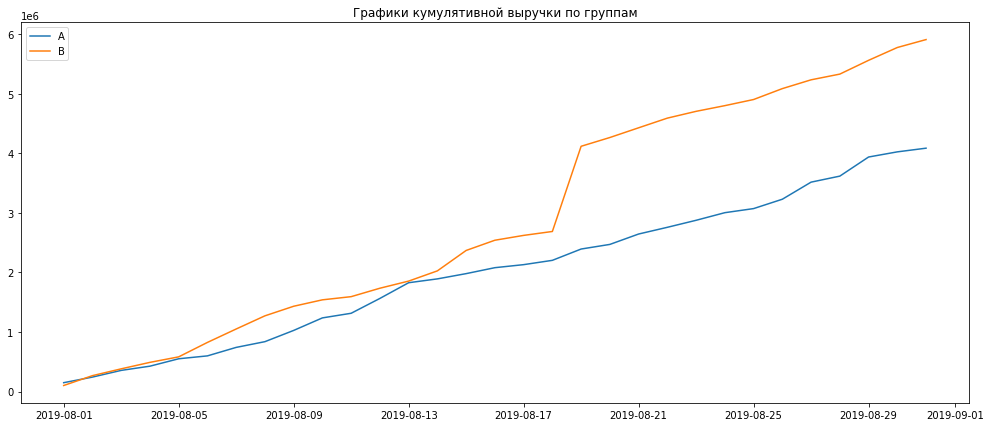

In [29]:
# строим график выручки группы А
plt.figure(figsize=(17, 7))
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'], label='B')
plt.title('Графики кумулятивной выручки по группам')
plt.legend() 
plt.show()

**Выводы и предположения**
* Выручка постоянно и почти равномерно увеличивается в течение всего теста - и это хороший признак. Однако с 19 августа сегмент В резко вырывается вперед и продолжает удерживать лидирующую позицию до конца теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. При заключительном анализе такие заказы нужно будет исключить.

### Построим графики кумулятивного среднего чека по группам 

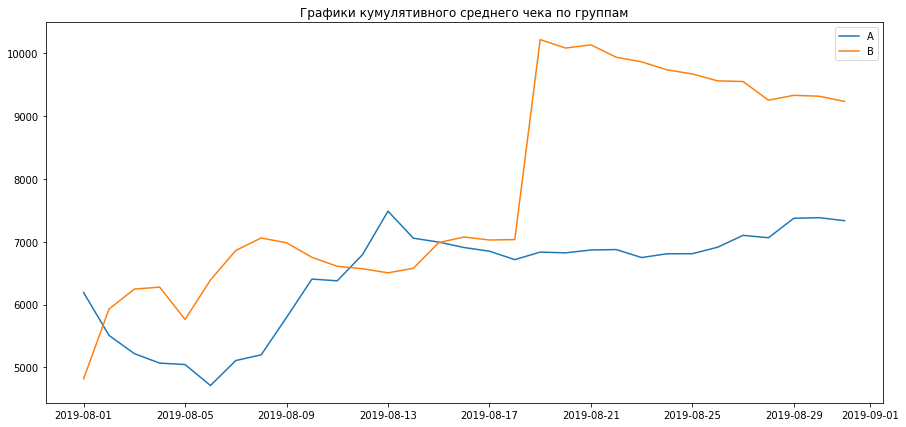

In [30]:
# Для этого разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15, 7))
plt.plot(cum_rev_A['date'], cum_rev_A['revenue']/cum_rev_A['orders'], label='A')
plt.plot(cum_rev_B['date'], cum_rev_B['revenue']/cum_rev_B['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам')
plt.legend() 
plt.show()

**Выводы**
* Кумулятивное значение среднего чека так и не стало равномерным и продолжает серьезно колебаться. Также в группу В возможно попали крупные заказы (это видно со второй половины теста - резкий скачок). Скорее всего группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Принимать решение по этой метрике рано, требуется дополнительный анализ выбросов, которые искажают результаты.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Здесь нам потребуется добавить горизонтальную ось методом **axhline()** - «горизонтальная линия поперек оси»

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cum_rev_A.merge(cum_rev_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

In [32]:
# выведем первые 5 строк получившегося датасета
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


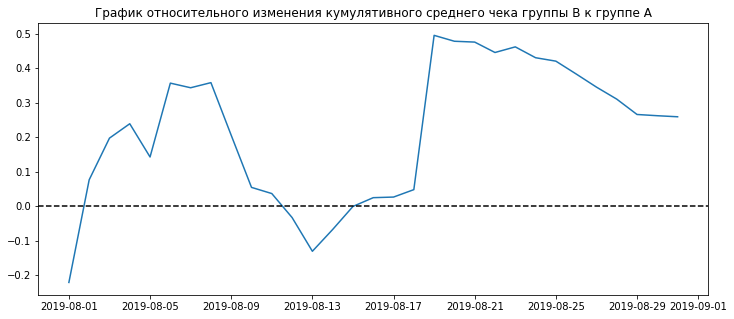

In [33]:
# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.show()

**Вывод**
* Мы построили график относительного различия кумулятивного среднего чека в группах. В некоторые даты результаты теста резко меняются, возможно тогда и были сделаны аномальные заказы

### Построим график кумулятивной конверсии по группам

* Проанализируем график кумулятивной конверсии. Зададим масштаб осей методом **plt.axis()**

In [34]:
# считаем кумулятивную конверсию
cumuData['conversion'] = cumuData['orders']/cumuData['visitors']

In [35]:
cumuData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [36]:
# отделяем данные по группе A
cumuData_A = cumuData[cumuData['group']=='A']

In [37]:
# отделяем данные по группе B
cumuData_B = cumuData[cumuData['group']=='B']

In [38]:
cumuData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [39]:
cumuData['date'].max()

Timestamp('2019-08-31 00:00:00')

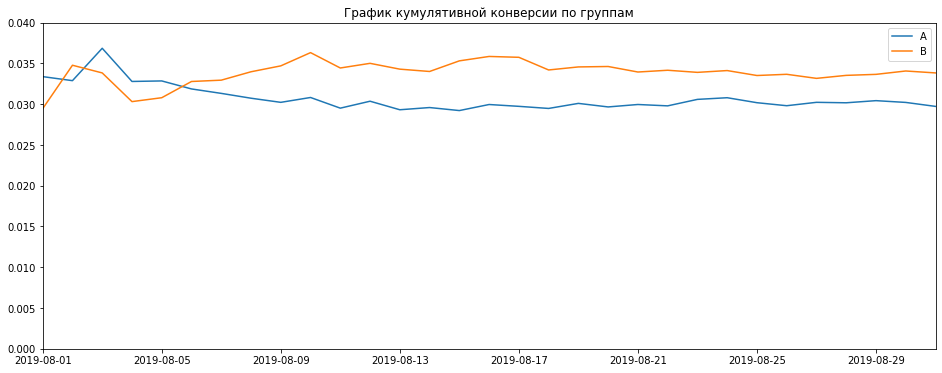

In [40]:
# строим графики
plt.figure(figsize=(16, 6))
plt.plot(cumuData_A['date'], cumuData_A['conversion'], label='A')
plt.plot(cumuData_B['date'], cumuData_B['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам') 


# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.04]) 
plt.show()

**Выводы**
* В самом начале тесте сегмент А имел немного большую конверсию, но, начиная с 6 августа, сегмент В выровнялся и зафиксировался примерно у одного значения, которые до конца теста оставалось больше, чем у сегмента А.
* Мы также изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста небольшое:  от 3% до 3.5% 

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [41]:
# объединим таблицы
cumu_conversion_gen = cumuData_A[['date', 'conversion']].merge(
cumuData_B[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes=['A', 'B'])

In [42]:
# посмотрим первые 5 строк
cumu_conversion_gen.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


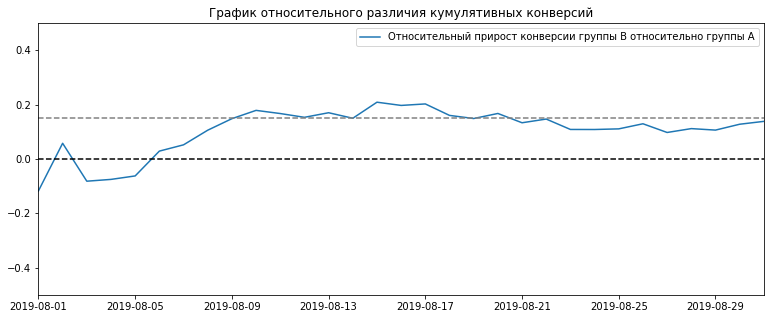

In [43]:
# построим график относительного различия кумулятивных конверсий
plt.figure(figsize=(13, 5))
plt.plot(cumu_conversion_gen['date'], cumu_conversion_gen['conversionB']/cumu_conversion_gen['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного различия кумулятивных конверсий')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]) #задаем масштаб осей
plt.show()

**Вывод**
* Почти с самого начала теста группа В лидирует по конверсии: становится лучше и фиксируется около прироста в 15% относительно группы А.

### Построим точечный график количества заказов по пользователям

In [44]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [45]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

In [46]:
orders_by_users.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [47]:
orders_by_users.columns = ['user_id', 'orders']

In [48]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


*Уже заметны пользователи с большим количеством заказов.* Такие влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок.

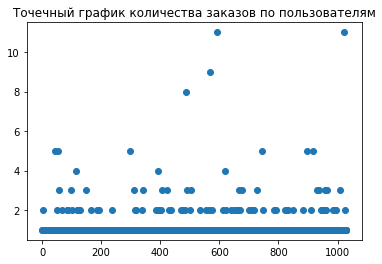

In [49]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

* Много пользователей с более чем 3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей

* для этого воспользуемся методом *np.percentile()*

In [50]:
np.percentile(orders_by_users['orders'], [90, 95, 99]) 

array([1., 2., 4.])

* Не более 5% пользователей оформляли больше 2 заказов, 10% пользователей заказывали более 1 раза и лишь 1% пользователей сделал более 4 заказов
* Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Построим точечный график стоимостей заказов

In [51]:
# отсортируем значения стоимостей заказов по убыванию
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


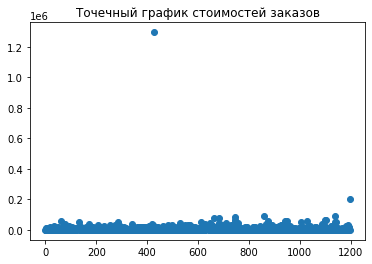

In [52]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

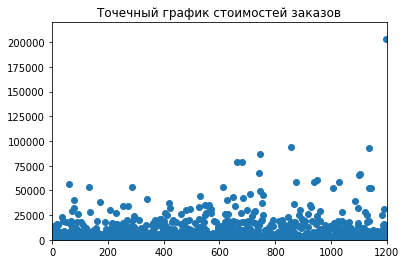

In [53]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1200 , 0, 220000]) 
plt.show()

* Аномательно дорогих заказов очень мало. Один заказ более 1.2 млн. и один заказ более 200 тыс.руб. Большинство заказов до 25 тыс. руб. и относительно немного заказов от 25 до 100 тыс. руб.

* Мы нашли заказ, который внес искажения на графики выше, наше предположение подтвердилось.

### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов

In [54]:
np.percentile(orders['revenue'], [90,95,99])

array([18168. , 28000. , 58233.2])

Не более, чем у 5% заказов чек более 28 тыс. рублей и не более, чем у 1% заказов - дороже 58 233.2 рублей.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

* Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [55]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [56]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [57]:
# посетители группы А по дням
visitors_A_day = visitors[visitors['group'] == 'A'][['date', 'visitors']]

In [58]:
visitors_A_day.columns = ['date', 'visit_per_date_A']

In [59]:
# считаем накопленные данные
visitors_A_cummul = visitors_A_day.apply(
    lambda x: visitors_A_day[visitors_A_day['date'] <= x['date']].agg({'date':'max', 'visit_per_date_A': 'sum'}), axis=1
)

In [60]:
visitors_A_cummul.head(3)

,date,visit_per_date_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845


In [61]:
visitors_A_cummul.columns = ['date', 'visitors_cummulative_A']

In [62]:
# посетители группы В по дням
visitors_B_day = visitors[visitors['group'] == 'B'][['date', 'visitors']]

In [63]:
visitors_B_day.columns = ['date', 'visit_per_date_B']

In [64]:
# считаем накопленные данные
visitors_B_cummul = visitors_B_day.apply(
    lambda x: visitors_B_day[visitors_B_day['date'] <= x['date']].agg({'date':'max', 'visit_per_date_B': 'sum'}), axis=1
)

In [65]:
visitors_B_cummul.head(3)

,date,visit_per_date_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803


In [66]:
visitors_B_cummul.columns = ['date', 'visitors_cummulative_B']

In [67]:
# найдем количество заказов и общую сумму чека в день
orders_A_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transaction_id': pd.Series.nunique, 'revenue':'sum'})
)

In [68]:
orders_A_daily.head()

,date,transaction_id,revenue
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [69]:
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [70]:
# кумулятивные (напопительные) показатели количества заказов и суммы заказов на каждый день для группы А
orders_A_cumu = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
    {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ), axis = 1
).sort_values(by = 'date')

In [71]:
orders_A_cumu.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [72]:
orders_A_cumu.columns = ['date', 'orders_cumu_A', 'revenue_cumu_A',]

* повторяем предыдущие шаги для группы В

In [73]:
orders_B_daily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transaction_id': pd.Series.nunique, 'revenue':'sum'})
)

In [74]:
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

In [75]:
orders_B_cumu = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
    {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ), axis = 1
).sort_values(by = 'date')

In [76]:
orders_B_cumu.columns = ['date', 'orders_cumu_B', 'revenue_cumu_B',]

In [77]:
general = (
    orders_A_daily.merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_A_cumu, left_on='date', right_on='date', how='left')
    .merge(orders_B_cumu, left_on='date', right_on='date', how='left')
    .merge(visitors_A_day, left_on='date', right_on='date', how='left')
    .merge(visitors_B_day, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummul, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummul, left_on='date', right_on='date', how='left')
)

In [78]:
general.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cumu_A,revenue_cumu_A,orders_cumu_B,revenue_cumu_B,visit_per_date_A,visit_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


* Названия столбцов данных ``general``:

    1) orders_per_date_A — количество заказов в выбранную дату в группе A;
    
    2) revenue_per_date_A — суммарная выручка в выбранную дату в группе A;
    
    3) orders_per_date_B — количество заказов в выбранную дату в группе B;
    
    4) revenue_per_date_B — суммарная выручка в выбранную дату в группе B;
    
    5) orders_cumu_A — суммарное число заказов до выбранной даты включительно в группе A;
    
    6) revenue_cumu_A — суммарная выручка до выбранной даты включительно в группе A;
    
    7) orders_cumu_B — суммарное количество заказов до выбранной даты включительно в группе B;
    
    8) revenue_cumu_B — суммарная выручка до выбранной даты включительно в группе B;
    
    9) visit_per_date_A — количество пользователей в выбранную дату в группе A;
    
    10) visit_per_date_B — количество пользователей в выбранную дату в группе B;
    
    11) visitors_cummulative_A — количество пользователей до выбранной даты включительно в группе A;
    
    12) visitors_cummulative_B — количество пользователей до выбранной даты включительно в группе B.

* **Посчитаем статистическую значимость различия в конверсии между группами**

*Создадим переменные orders_by_users_A и orders_by_users_B*. Для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [79]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

In [80]:
orders_by_users_A.columns = ['user_id', 'orders']

In [81]:
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

In [82]:
orders_by_users_B.columns = ['user_id', 'orders']

In [83]:
orders_by_users_A.head(3)

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1


Объявим переменные piece_A и piece_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

* Список индексов создали функцией **np.arange()**
* Последовательности объеденим функцией **pd.concat()**. Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части:

In [84]:
piece_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(general['visit_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)



In [85]:
piece_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(general['visit_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)


**Гипотезы:**
* H(0) - статистически значимых различий в конверсии между группами А и В нет
* H(1) - различия в конверсии есть

``Альфа``(уровень значимости) — это вероятность того, что мы совершим ошибку, отвергнув нулевую гипотезу, хотя на самом деле она верна. Значение ``p_value`` измеряет вероятность получения более экстремального значения, чем то, которое вы получили в ходе эксперимента. Если ``p_value`` больше, чем альфа, вы принимаете нулевую гипотезу. Если он меньше альфа, вы отвергаете нулевую гипотезу.

Популярными уровнями значимости являются 5%, 1% и 0.1%. Для данного проекта я приму менее строгую α = 0.05.

In [86]:
# определим p-value 
result = stats.mannwhitneyu(piece_A, piece_B)[1]
display("P-value = {0:.3f}".format(result))
alpha = 0.05
if result < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима!')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет.')

'P-value = 0.017'

По неочищенным данным в конверсии групп A и B разница статистически значима!


* Мы определили **p-value** и он меньше, чем 0.05. Это значит, что нулевую гипотезу о том, различий в конверсии между группами нет - отвергаем. 
* Анализ "сырых" данных говорит нам о том, что в конверсии между группами есть статистически значимые различия

In [87]:
# определим прирост конверсии группы В к группы А
display("{0:.3f}".format(piece_B.mean() / piece_A.mean() - 1))

'0.138'

* Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

**Вывод:**
По "сырым" данным различия в конверсии групп А и В есть!

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным


**Гипотезы:**
* H(0) - различий в среднем чеке между группами А и В нет
* H(1) - различия в среднем чеке между группами есть 


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию *mannwhitneyu()* данные о выручке с заказов.

In [111]:
reslt = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05
display('P-value = {0:.3f}'.format(reslt))
if reslt < alpha:
    print('По "сырым" данным в среднем чеке заказа групп A и B разница статистически значима!')
else:
    print('По "сырым" данным в среднем чеке заказа групп A и B разницы нет.')

'P-value = 0.729'

По "сырым" данным в среднем чеке заказа групп A и B разницы нет.


**p-value** больше 0.05 - причин отвергать нулевую гипотезу нет, статистически значимых отличий в среднем чеке между группами нет. 


In [89]:
display('{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'25.87%'

А вот средний чек группы В на 25,9% больше группы А. 

Нужно проанализировать аномалии.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

* 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя соответственно.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — ``users_many_orders`` и пользователей, совершивших заказы дороже 30 000 — ``users_expensive_orders``. Объединим их в таблице ``abnormal_users``.

In [90]:
users_many_orders = pd.concat(
    [
       orders_by_users_A[orders_by_users_A['orders'] > 2]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['user_id']
    ], axis = 0

)

In [91]:
users_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

In [92]:
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [93]:
abnormal_users.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [94]:
abnormal_users.shape

(68,)

Мы получили множество аномальных пользователей в количестве 68 шт. После их удаления можно считать статистическую значимость. Нужно выяснить, если ли различия между группами с "очищенными" данными.

In [95]:
# подготовим выборки количества заказов по пользователям по группам теста
piece_A_filter = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
                           pd.Series(0, index=np.arange(general['visit_per_date_A'].sum() - len(orders_by_users_A['orders'])),
                                    name = 'orders')], axis = 0)

In [96]:
piece_A_filter.head(3)

0    1
1    1
2    1
Name: orders, dtype: int64

In [97]:
piece_B_filter = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
                           pd.Series(0, index=np.arange(general['visit_per_date_B'].sum() - len(orders_by_users_B['orders'])),
                                    name = 'orders')], axis = 0)

In [98]:
piece_B_filter.head(3)

0    1
1    1
2    1
Name: orders, dtype: int64

**Гипотезы:**
* H(0) - различий в конверсии по "очищенным" данным между группами А и В нет
* H(1) - различия в конверсии по "очищенным" данным между группами есть 


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию *mannwhitneyu()* данные о выручке с заказов.

In [108]:
result_1 = stats.mannwhitneyu(piece_A_filter, piece_B_filter)[1]
alpha =0.05
display('P-value = {0:.3f}'.format(result_1))
if result_1 < alpha:
    print('По "очищенным" данным в конверсии групп A и B разница статистически значима!')
else:
    print('По "очищенным" данным различий в конверсии групп A и B нет.')

'P-value = 0.013'

По "очищенным" данным в конверсии групп A и B разница статистически значима!


In [100]:
#относительный прирост конверсии очищенной группы В.
display('{0:.2%}'.format(piece_B_filter.mean()/piece_A_filter.mean()-1))

'17.16%'

Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмет В на 17% лучше конвертируется по сравнению с группой А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Гипотезы:**
* H(0) - различий в среднем чеке по "очищенным" данным между группами А и В нет
* H(1) - различия в среднем чеке по "очищенным" данным между группами есть 

In [114]:
alpha = 0.05
resultat = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    
print('P-value = {0:.3f}'.format(resultat))
if reslt < alpha:
    print('По "очищенным" данным в среднем чеке заказа групп A и B разница статистически значима!')
else:
    print('По "очищенным" данным в среднем чеке заказа групп A и B разницы нет.')

P-value = 0.720
По "очищенным" данным в среднем чеке заказа групп A и B разницы нет.


In [121]:
# найдем разницу между сегментами А и В
difference = (orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1)
    
print("Разница между сегментами {0:.3%}".format(difference)) 

Разница между сегментами -2.310%


* Нельзя опровергнуть гипотезу о разнице средних чеков после очистки выбросов. Различие небольшое и составляет всего 2,3% в пользу группы А. На феноменальный скачок среднего чека группы В повлияли выбросы. 

## Выводы
Варианты принимаемых решений:

1) Остановить тест, зафиксировать победу одной из групп.

2) Остановить тест, зафиксировать отсутствие различий между группами.

3) Продолжить тест.


* Кумулятивные метрики по выручке, по среднему чеку и по конверсии пользователей все время лидируют в группе В.
* Сомнения могут возникнуть из-за резких колебаний на графике кумулятивного среднего чека в группе В по отношению к группе А, но после очиски данных разница средних чеков стала минимальной.
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. До и после очистки данных показатели конверсии в группе В больше показателя в группе А - сначала на 13,8% далее на 17%, хотя конверсия по среднему чеку не имеет значимых различий между группами.
* Это позволяет нам сделать вывод о том, что можно остановить тест и зафиксировать победу группы В.